# BMI_dataset predictions and data analysis

##### This is a starter project containing 500 fields of data, dataset can be found here: [Kaggle](https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex/versions/2?resource=download)

   ## Introduction

This notebook involves the use of many machine learning algorithms like decision tree to classify datapoints within a given dataset. In this case a dataset about the body mass index of people given a few variables and six class labels. In this task, we will hope to achieve to understand the classification of body mass index of a new given datapoint and to understand trends and patterns that can be discovered when visualising. We are choosing classification to find the most accurate possible solution to as where a new datapoint would place. Regression in this instance would not be effective as we are dealing with discrete values. The **objective** is to perform exploratory data analysis and use a few classification models to predict. Afterwards, we will try to improve these scores by changing criterias.

## Introduction to the chosen techniques

A decision tree works through an iterative process of solutions through information gain to classify datapoints based on parameters. Depending on the dataset and depth, a fully grown decision tree can be vast. The way to work through a decision tree is to calculate values through looking at each attribute and label indivdually. Going from the top node to the leaf node is how to come to a decision about a datapoint.

#### What python libraries will be used? What classifiers will be used?

- Python libraries: NumPy, matplotlib, pandas, seaborn, sklearn.
- Classifiers: Decision tree, knn, bayesian classifier, linear regression.

## Introduction of the dataset

Our dataset is called bmi_dataset. It has three variables (Gender, Weight, Height) and six class labels to determine how obese a person is. For the purpose of implementing classifiers, we will be splitting 500 records into 70% (training) and 30% (test)

In [206]:
#print dataset
dataset

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


We print the dataset to have a glance of the head and tail of the data.

### What are we trying to understand about the attributes?

In [207]:
#check to see if there are any missing values
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

There are no missing values.

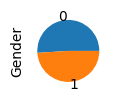

In [208]:
# Calculate the split of two genders
dataset.Gender.value_counts(normalize=True)
#plot the bar graph of two genders
dataset.Gender.value_counts(normalize=True).plot.pie()
plt.show()

51% of the data are females and 49% are males.

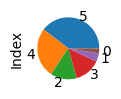

In [209]:
# Calculate the split of BMI(Index)
dataset.Index.value_counts(normalize=True)
#plot the bar graph of BMI(Index)
dataset.Index.value_counts(normalize=True).plot.pie()
plt.show()

It seems like a large portion of the people are considered very obese, we have to discover if any of the variables have any effect on this.

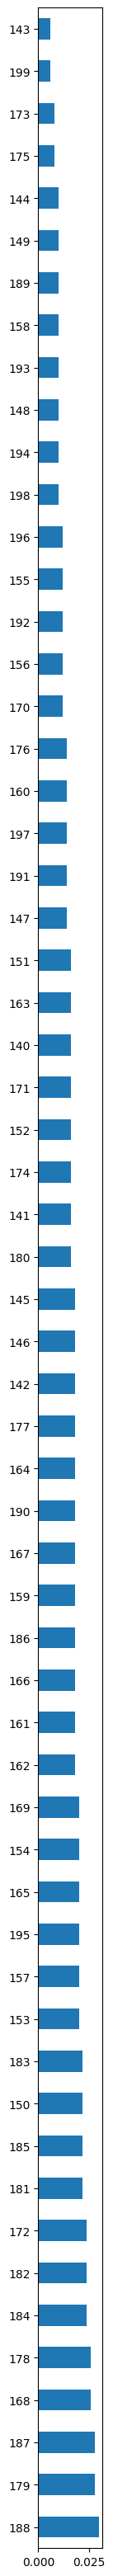

In [210]:
# Calculate the split of Height
dataset.Height.value_counts(normalize=True)
#plot the bar graph of Height
dataset.Height.value_counts(normalize=True).plot.barh()
plt.rcParams["figure.figsize"] = (1,40)
plt.show()

The height of people are grouped and shown as a percentage. It shows that 143cm is the least common and 188cm is the most common.

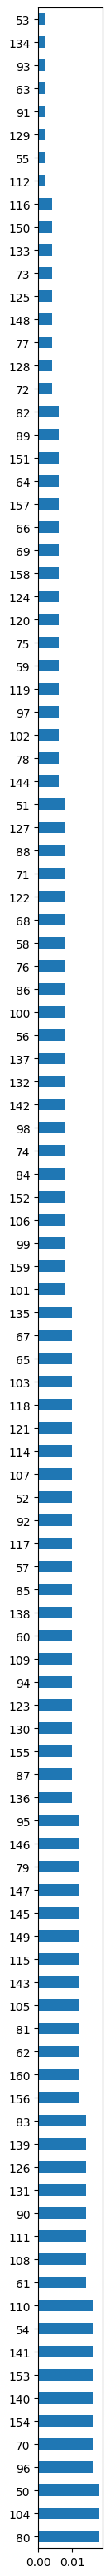

In [211]:
# Calculate the split of Weight
dataset.Weight.value_counts(normalize=True)
#plot the bar graph of Weight
dataset.Weight.value_counts(normalize=True).plot.barh()
plt.rcParams["figure.figsize"] = (5,40)
plt.show()

The weight of people are grouped and shown as percentages. 80kg, 50kg and 104kg are the most common.

In [212]:
#lets look at the statistics of these attributes
dataset.Weight.describe()

count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64

The average person is 106kg.

In [213]:
#statistics of Height attribute
dataset.Height.describe()

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64

The average person is 170cm tall [rounded]

In [214]:
#statistics of Index attribute
dataset.Index.describe()

count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64

The average person is on a 3.7 out of 5 in terms of obese which is close to obese.

### Multivariate analysis
- Scatterplot, correlation analysis, pair plot

<function matplotlib.pyplot.show(close=None, block=None)>

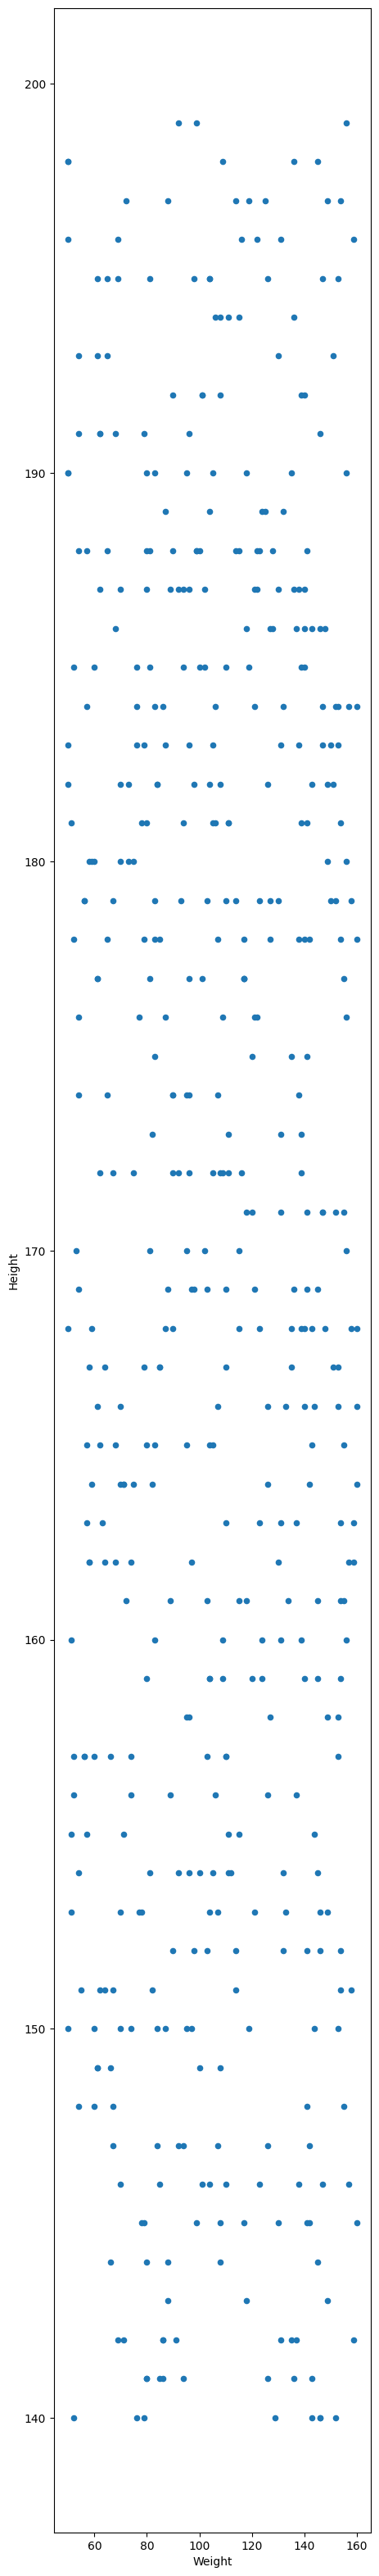

In [216]:
#Scatterplot for height and weight attribute
dataset.plot.scatter(x="Weight",y="Height")
plt.rcParams["figure.figsize"] = (8,40)
plt.show

There is a consistent hourglass figure showing if you look at the y axis. This seems to tail off at the 200cm mark.

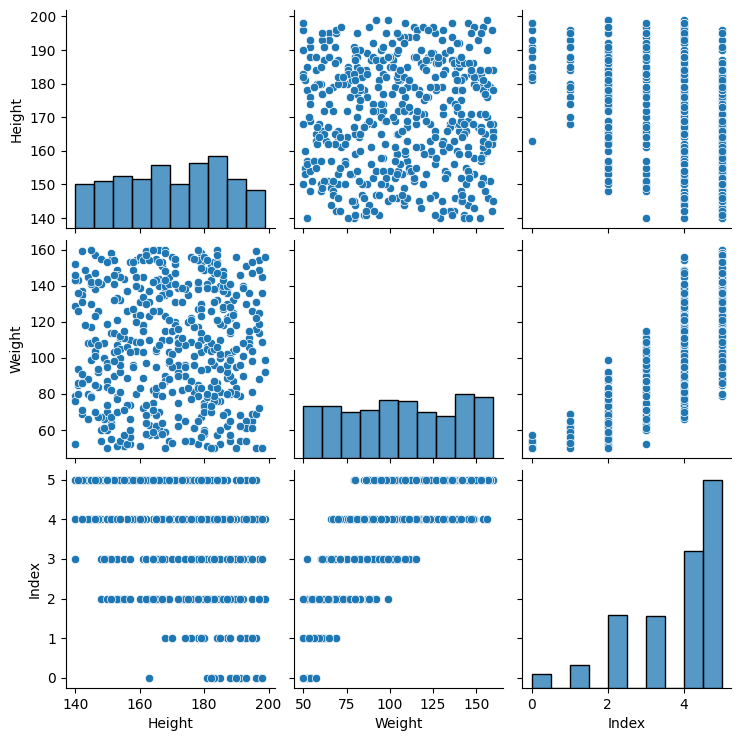

In [217]:
#Generate pairplot for weight, height, index
sns.pairplot(data = dataset, vars=['Height','Weight','Index'])
plt.show()

This matrix shows the correlation between every label. For example, people who are on the taller side (180-200cm) tend to have less of a score in terms of obesity.  There are some outliers however.

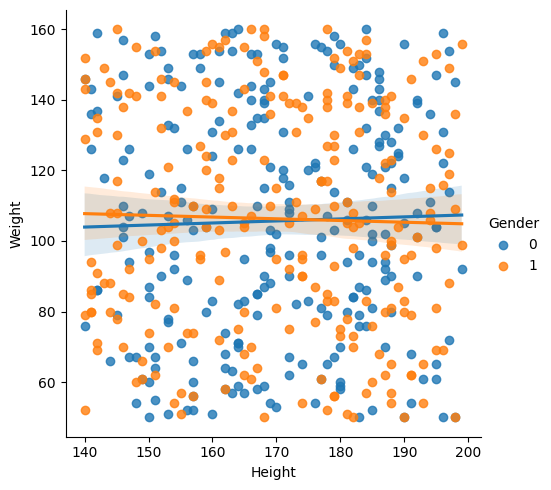

In [218]:
sns.lmplot(x="Height",y="Weight",hue='Gender',data=dataset)

The relationship between the genders to the weight and heights using regression. Females tend to weigh more and are shorter than their counterparts who are taller but weigh less.

In [219]:
#correlation analysis
dataset.corr()

,Gender,Height,Weight,Index
Gender,1.000000,-0.017677,0.009523,0.028786
Height,-0.017677,1.000000,0.000446,-0.422223
Weight,0.009523,0.000446,1.000000,0.804569
Index,0.028786,-0.422223,0.804569,1.000000


The highest correlation is weight to index which makes sense as this definitely contributes whether to someone is obese or not.

## Input encoding/input representation (How and why?)

In our dataset, one attribute is categorical (Gender) where the values are "Male" and "Female". Most classifiers require all the values to be numeric for better classifying and predictions.


To fix this, we can change the values to 0 and 1 through label encoding

In [220]:
#Import dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bmi_500/bmi_dataset.csv')
#View first five records
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## Coding implementation with comments

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
# All python libraries required
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import pandas as pd
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [223]:
#handling categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [224]:
#split the dataset, test set = 30%, training set = 70%
X = dataset.drop('Index', axis = 1)
y = dataset['Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 3)
(350,)
(150, 3)
(150,)


In [225]:
from sklearn.preprocessing import StandardScaler      # import StandardScaler fom the preprocessing package of sklearn
sc = StandardScaler()                                 # create a StandardScaler object sc
X_train = sc.fit_transform (X_train)                  # fit and transform the X_train using the object sc
X_test = sc.transform(X_test)                         # transform the X_test using the object sc

In [226]:
#prepare all classification models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(criterion = 'entropy', max_depth = 3),
    GaussianNB()]

In [227]:
#scores of models

for clf in classifiers:
    clf.fit(X_train, y_train) #Fit both training models into classifiers
    name = clf.__class__.__name__ #name of classifier
    print(name) #print name of classifier

    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions) #generate accuracy score
    print("Accuracy: {:.1%}".format(acc))
    print("\n")

KNeighborsClassifier
Accuracy: 88.0%


DecisionTreeClassifier
Accuracy: 63.3%


GaussianNB
Accuracy: 73.3%




We said regression models may not be effective but we will have a try at implementing it.

In [228]:
#Multiple linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train) #fit both training sets on lr model

LinearRegression()

In [229]:
y_pred = LR.predict(X_test)

In [230]:
y_pred #predict obesity (index)

array([3.55504956, 3.28147196, 2.47013049, 1.21583536, 3.22019142,
       2.26557338, 4.10001673, 3.9241529 , 3.82894348, 3.1815636 ,
       4.39718946, 3.75406131, 3.6934963 , 4.06948662, 3.7644845 ,
       4.84698866, 4.63639098, 1.68914024, 3.8568318 , 3.45840908,
       4.2641572 , 5.01511254, 2.53852489, 2.77929491, 4.00073446,
       2.17259999, 2.47760211, 5.24541137, 4.66853103, 2.34045555,
       3.31459586, 4.70993153, 3.08590697, 3.49260628, 3.11227478,
       1.62164026, 4.74314488, 3.51629085, 5.72672453, 3.62599631,
       3.12010417, 2.33280504, 2.53610997, 4.49745559, 2.50182333,
       5.55743791, 2.30894159, 3.18858802, 3.0509048 , 3.69787893,
       3.9241529 , 1.96947394, 2.07009783, 5.42136464, 5.49002737,
       3.6261752 , 3.82531784, 4.60653496, 2.43655938, 3.22162248,
       5.6846085 , 2.30759997, 3.62930564, 3.89680123, 4.8729987 ,
       4.87290926, 4.27162882, 2.13768726, 2.56860779, 5.07594587,
       3.62590687, 6.05934664, 3.69013898, 4.81368587, 2.20670

In [231]:
import statsmodels.api as sm
MLR_ols = sm.OLS(y, X).fit() #Creating multiple linear regression model
# MLR_ols.summary()
MLR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Index   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              4034.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                        0.00
Time:                        07:13:48   Log-Likelihood:                         -592.55
No. Observations:                 500   AIC:                                      1191.
Df Residuals:                     497   BIC:                                      1204.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender         0.1513      0.071      2.142      0.033       0.013       0.290
Height        -0.0029      0.001     -4.065      0.000      -0.004      -0.001
Weight         0.0388      0.001     36.976      0.000       0.037       0.041
==============================================================================
Omnibus:                       14.760   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.490
Skew:                           0.418   Prob(JB):                     0.000433
Kurtosis:                       2.787   Cond. No.                         401.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
print('Train Score: ', LR.score(X_train, y_train)*100, "%")
print('Test Score: ', LR.score(X_test, y_test)*100, "%")
print("The coeficients: ", LR.coef_)
print("The y-intercept: ", LR.intercept_)

Train Score:  81.95934724070338 %
Test Score:  84.01321321100754 %
The coeficients:  [ 0.04709355 -0.55868398  1.08617451]
The y-intercept:  3.7657142857142856


The accuracy scores are better than some other models.

## Analysis of results and comments

#### Analysis of predictions, describe how accurate it is/ any outliers etc.


For our predictions, we prepared the classifiers all together and the linear regression model by itself. The goal was to achieve as high as an accuracy score as possible for the classifiers and high r-squared value for the regression model.

From the initial run, the values are as follows:
- KNN: 88%
- Decision tree: 63.3%
- Gaussian Naive Bayes: 73.3%
- MLR model - Adjusted R-squared: 0.960

*KNN* is our highest classifier which makes it the most reliable for placing an unknown datapoint, and the *MLR* has a high R-squared value which suggests the relationship is positive and can actually be used as a predictor.

#### How to improve predictions?
To improve predictions, we can change some of the parameters for the models. For example, we can change the decision tree depth to 16 from 3, this means that before making a prediction it can go through 16 options which suggests computation will be slower.

In [233]:
#improved decision tree
classifiers = [DecisionTreeClassifier(criterion = 'entropy', max_depth = 16)]

In [234]:
#Improved score

for clf in classifiers:
    clf.fit(X_train, y_train) #Fit both training models into classifiers
    name = clf.__class__.__name__ #name of classifier
    print(name) #print name of classifier

    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions) #generate accuracy score
    print("Accuracy: {:.1%}".format(acc))
    print("\n")

DecisionTreeClassifier
Accuracy: 88.0%




As you can see above, the accuracy appreciated from 63.6% to 86+%

We can also use a different type of Naive Bayes classifier to make a classification. We can switch from Gaussian to Bernoulli to see if the accuracy is higher.

In [235]:
#Implementing BernNB
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
y_expect = y_test
y_pred = BernNB.predict(X_test)
acc = accuracy_score(y_expect, y_pred) #generate accuracy score
print("Accuracy: {:.1%}".format(acc))


Accuracy: 40.7%


Unfortunately, this type of Naive Bayes classifying has less accuracy.